## Metrabs 3D

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

model = hub.load('https://bit.ly/metrabs_l') 

In [ ]:
def plot_results(image, pred, joint_names, joint_edges):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.patches import Rectangle
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image.numpy())
    for x, y, w, h, c in pred['boxes'].numpy():
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -75)
    pose_ax.set_xlim3d(-1500, 1500)
    pose_ax.set_zlim3d(-1500, 1500)
    pose_ax.set_ylim3d(2000, 5000)
    poses3d = pred['poses3d'].numpy()
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, pred['poses2d'].numpy()):
        for i_start, i_end in joint_edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

In [ ]:
joint_names = model.per_skeleton_joint_names['smpl+head_30'].numpy().astype(str)
joint_edges = model.per_skeleton_joint_edges['smpl+head_30'].numpy()
plot_results(img, pred, joint_names, joint_edges)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D


# Path to the image in your dataset
image_path = '/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000077.jpg'  # Replace with the actual file path

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(1024, 1024)):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)  # Ensure the image has 3 channels (RGB) and dtype uint8
    img = tf.image.resize(img, target_size)
    img = tf.cast(img, tf.uint8)  # Ensure the image is of type uint8 after resizing
    return img

# Load and preprocess the image
img = load_and_preprocess_image(image_path)

# Predict poses
pred = model.detect_poses(img, skeleton='smpl+head_30')

# Function to plot results
def plot_results(image, pred, joint_names, joint_edges):
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image.numpy())  # Display the image
    for x, y, w, h, c in pred['boxes'].numpy():
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -75)
    pose_ax.set_xlim3d(-2500, 2500)
    pose_ax.set_zlim3d(-2500, 2500)
    pose_ax.set_ylim3d(2000, 5000)
    poses3d = pred['poses3d'].numpy()
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, pred['poses2d'].numpy()):
        for i_start, i_end in joint_edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

# Get joint names and edges
joint_names = model.per_skeleton_joint_names['smpl+head_30'].numpy().astype(str)
joint_edges = model.per_skeleton_joint_edges['smpl+head_30'].numpy()

# Plot the results
plot_results(img, pred, joint_names, joint_edges)


In [ ]:
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
import os
import time
import numpy as np



# Path to the video file
video_path = '/kaggle/input/videotest/multi-person walking.mp4'  # Replace with the actual video file path
output_dir = '/kaggle/working/output'  # Directory to save the results
os.makedirs(output_dir, exist_ok=True)

# Function to load and preprocess the image
def load_and_preprocess_image(frame, target_size=(512, 512)):
    img = tf.image.convert_image_dtype(frame, dtype=tf.uint8)
    img = tf.image.resize(img, target_size)
    img = tf.cast(img, tf.uint8)  # Ensure the image is of type uint8 after resizing
    return img

# Function to draw the results on the frame
def draw_results(image, pred, joint_names, joint_edges):
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image.numpy())  # Display the image
    for x, y, w, h, c in pred['boxes'].numpy():
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -75)
    pose_ax.set_xlim3d(-1500, 1500)
    pose_ax.set_zlim3d(-1500, 1500)
    pose_ax.set_ylim3d(2000, 5000)
    poses3d = pred['poses3d'].numpy()
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, pred['poses2d'].numpy()):
        for i_start, i_end in joint_edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

    fig.canvas.draw()
    result_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    result_image = result_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return result_image

# Get joint names and edges
joint_names = model.per_skeleton_joint_names['smpl+head_30'].numpy().astype(str)
joint_edges = model.per_skeleton_joint_edges['smpl+head_30'].numpy()

# Function to process video and measure time
def process_video(device):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    output_video_path = os.path.join(output_dir, f'output_video_{device}.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_number = 0
    start_time = time.time()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Load and preprocess the frame
        img = load_and_preprocess_image(frame_rgb)

        # Predict poses
        with tf.device(f'/device:{device}:0'):
            pred = model.detect_poses(img, skeleton='smpl+head_30')

        # Draw results on the frame
        result_frame = draw_results(img, pred, joint_names, joint_edges)

        # Convert the result back to BGR format for saving
        result_frame_bgr = cv2.cvtColor(result_frame, cv2.COLOR_RGB2BGR)
        out.write(result_frame_bgr)

        frame_number += 1

    cap.release()
    out.release()

    total_time = time.time() - start_time
    print(f"Processed video with {device} in {total_time:.2f} seconds. Saved at {output_video_path}")
    return total_time

# Process video with GPU
gpu_time = process_video('GPU')

# Process video with CPU
cpu_time = process_video('CPU')

print(f"Time taken with GPU: {gpu_time:.2f} seconds")
print(f"Time taken with CPU: {cpu_time:.2f} seconds")


## Mediapipe 3D 

In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [2]:
!wget -O pose_l_andmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task


## Pre-processing:
  * Loading the Image:The image is loaded from a file using mp.Image.create_from_file("Test1.jpg"). This image is prepared as an input for the MediaPipe Pose Landmarker model.
  * Input Size: The input size to the model depends on the internal resizing done by the MediaPipe Pose Landmarker. Typically, MediaPipe models resize the image to a standard size (like 256x256 or 192x256 pixels) internally, but this is handled automatically by the model and isn't explicitly shown in this code.
  * Base Options:The model asset path is specified using BaseOptions, which points to the .task file for the Pose Landmarker.
        Code: base_options = python.BaseOptions(model_asset_path='/content/pose_l_andmarker.task')

Z difference between left shoulder and left hand: 0.1359 (Not Sticked)
Z difference between right shoulder and right hand: 0.2620 (Not Sticked)


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


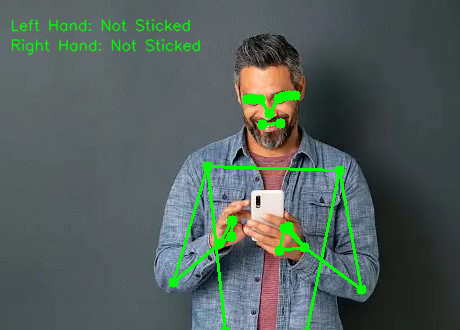

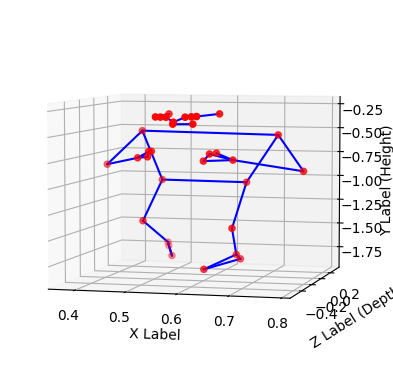

In [5]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow

def draw_landmarks_on_image(image, detection_result, status_left, status_right):
    annotated_image = np.copy(image)  
    for pose_landmarks_list in detection_result.pose_landmarks:
        for landmark in pose_landmarks_list:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(annotated_image, (x, y), 5, (0, 255, 0), -1)
        for connection in mp.solutions.pose.POSE_CONNECTIONS:
            start_idx = connection[0]
            end_idx = connection[1]
            start_landmark = pose_landmarks_list[start_idx]
            end_landmark = pose_landmarks_list[end_idx]
            start_point = (int(start_landmark.x * image.shape[1]), int(start_landmark.y * image.shape[0]))
            end_point = (int(end_landmark.x * image.shape[1]), int(end_landmark.y * image.shape[0]))
            cv2.line(annotated_image, start_point, end_point, (0, 255, 0), 2)  
    font_scale = 0.5
    thickness = 1
    cv2.putText(annotated_image, f"Left Hand: {status_left}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), thickness, cv2.LINE_AA)
    cv2.putText(annotated_image, f"Right Hand: {status_right}", (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), thickness, cv2.LINE_AA)

    return annotated_image  
def plot_3d_landmarks(detection_result):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for pose_landmarks_list in detection_result.pose_landmarks:
        xs = [landmark.x for landmark in pose_landmarks_list]
        ys = [landmark.y for landmark in pose_landmarks_list]
        zs = [landmark.z for landmark in pose_landmarks_list]
        xs, ys, zs = xs, zs, [-y for y in ys]  

        ax.scatter(xs, ys, zs, c='r', marker='o')  
        for connection in mp.solutions.pose.POSE_CONNECTIONS:
            start_idx = connection[0]
            end_idx = connection[1]
            ax.plot([xs[start_idx], xs[end_idx]],
                    [ys[start_idx], ys[end_idx]],
                    [zs[start_idx], zs[end_idx]], 'b-')  
    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label (Depth)')
    ax.set_zlabel('Y Label (Height)')

    ax.view_init(5, -75)
    plt.show()  

def calculate_z_difference(point1, point2):
    return abs(point1[2] - point2[2])  
def extract_and_calculate_z_differences(detection_result):
    left_shoulder_idx = 11
    right_shoulder_idx = 12
    left_hand_idx = 15
    right_hand_idx = 16

    status_left = "Sticked"
    status_right = "Sticked"

    for pose_landmarks_list in detection_result.pose_landmarks:
        poses3d = [(landmark.x, landmark.y, landmark.z) for landmark in pose_landmarks_list]

        left_shoulder_point = poses3d[left_shoulder_idx]
        right_shoulder_point = poses3d[right_shoulder_idx]
        left_hand_point = poses3d[left_hand_idx]
        right_hand_point = poses3d[right_hand_idx]
        z_difference_left = calculate_z_difference(left_shoulder_point, left_hand_point)
        z_difference_right = calculate_z_difference(right_shoulder_point, right_hand_point)

        if z_difference_left > 0.1:
            status_left = "Not Sticked"
        if z_difference_right > 0.1:
            status_right = "Not Sticked"

        print(f"Z difference between left shoulder and left hand: {z_difference_left:.4f} ({status_left})")
        print(f"Z difference between right shoulder and right hand: {z_difference_right:.4f} ({status_right})")

    return status_left, status_right  
base_options = python.BaseOptions(model_asset_path='/content/pose_l_andmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True,  
    num_poses=5  
)
detector = vision.PoseLandmarker.create_from_options(options)

image = mp.Image.create_from_file("Test1.jpg")  
detection_result = detector.detect(image)  

status_left, status_right = extract_and_calculate_z_differences(detection_result)
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result, status_left, status_right)

cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

plot_3d_landmarks(detection_result)


## The extract_and_calculate_z_differences function:
 This function is designed to analyze the 3D positional data of specific body landmarks detected by the MediaPipe Pose Landmarker model, specifically focusing on the shoulders and hands. This function first identifies the indices of the left and right shoulders and hands in the list of detected landmarks. It then extracts the 3D coordinates (x, y, z) of these points, where the z-coordinate represents the depth relative to the camera. The core task of the function is to calculate the absolute difference in the z-coordinate between each shoulder and its corresponding hand. This z-difference provides a measure of how far each hand is from the shoulder in terms of depth. Based on these differences, the function determines whether each hand is "Sticked" (close to the shoulder) or "Not Sticked" (farther away). The function ultimately returns the status of both the left and right hands, which can be used for further processing or visualization.
*texte en italique*